# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats.distributions as dist

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [49]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx,DMDEDUC2x,BMXHT2,AGEGRP
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,43.3,43.6,35.9,101.1,2.0,Yes,Male,College,72.637795,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,38.0,40.0,33.2,107.9,NaN,Yes,Male,No college,67.480315,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,35.6,37.0,31.0,116.5,2.0,Yes,Male,No college,66.968504,"(70, 80]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,38.5,37.7,38.3,110.1,2.0,No,Female,College,63.346457,"(50, 60]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,37.4,36.0,27.2,80.4,2.0,No,Female,No college,64.921260,"(40, 50]"


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [24]:
# Proportion of women and men who smoke
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
dz = dx.groupby("RIAGENDRx")["SMQ020x"].agg([lambda z: np.mean(z=="Yes"), "size"])
dz.columns = ["Smoke", "N"]
print(dz)

              Smoke     N
RIAGENDRx                
Female     0.304845  2972
Male       0.513258  2753


In [25]:
# Construct dataframe for females who smoke 
dx_females = dx.loc[dx.RIAGENDRx=="Female", "SMQ020x"].replace({"Yes": 1, "No": 0})
dx_females

3       0
4       0
5       0
7       0
12      1
       ..
5724    0
5727    0
5730    1
5732    1
5734    0
Name: SMQ020x, Length: 2972, dtype: int64

In [26]:
# Construct dataframe for males who smoke 
dx_males = dx.loc[dx.RIAGENDRx=="Male", "SMQ020x"].replace({"Yes": 1, "No": 0})
dx_males

0       1
1       1
2       1
6       1
8       0
       ..
5726    1
5728    0
5729    0
5731    0
5733    1
Name: SMQ020x, Length: 2753, dtype: int64

In [27]:
# Print test statistic, p-value, degrees of freedom
sm.stats.ttest_ind(dx_females, dx_males) 

(-16.420585558984445, 3.0320887866906843e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

At a significance level of 0.05, there is sufficient evidence to reject the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke (p < 0.001). Hence, we conclude that there is a significant difference between the population proportion of women who smoke and men who smoke. 

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [28]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [29]:
# 95% CI for the proportion of females who smoke
sm.stats.proportion_confint(906, 906+2066)  

(0.2882949879861214, 0.32139545615923526)

In [30]:
# 95% CI for the proportion of males who smoke
sm.stats.proportion_confint(1413, 1413+1340)  

(0.49458749263718593, 0.5319290347874418)

In [32]:
# Calculate SE for male and female smokers
p = dz.Smoke.Female # Female proportion
n = dz.N.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Smoke.Male # Male proportion
n = dz.N.Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.008444152146214435
0.009526078653689868


In [33]:
# Calculate the difference in SE
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [34]:
# Construct a 95% confidence interval for the difference in proportions
d = dz.Smoke.Female - dz.Smoke.Male
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff
print(d, "(",lcb, ucb,")")

-0.20841304163963553 ( -0.2333636091471941 -0.18346247413207697 )


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The 95% confidence interval for the difference in proportions between female smokers and male smokers reinforces and adds support to the hypothesis test as 0 is not within the confidence interval. This shows that we are able to estimate, with 95% confidence level, that the proportion of women who smoke is not equal to the proportion of men who smoke.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [38]:
# Partition the population into two groups based on whether a person has graduated college or not
da[["DMDEDUC2x"]] = da.DMDEDUC2.replace({5:"College", (1, 2, 3, 4):"No college", 
                                       7: np.nan, 9:np.nan})
dx = da[["DMDEDUC2x", "BMXHT"]].dropna()
dx

,DMDEDUC2x,BMXHT
0,College,184.5
1,No college,171.4
2,No college,170.1
3,College,160.9
4,No college,164.9
...,...,...
5730,No college,165.8
5731,College,182.2
5732,No college,152.2
5733,No college,173.3


In [40]:
# Construct dataframe for height of college and non-college graduates
ht_college = dx.loc[dx.DMDEDUC2x=="College", "BMXHT"]
ht_no_college = dx.loc[dx.DMDEDUC2x=="No college", "BMXHT"]

In [41]:
# Print mean height of college and non-college graduates
print(ht_college.mean(), ht_no_college.mean())

167.85535055350562 165.4665188470065


In [42]:
# Print test statistic and p-value using z-test
print(sm.stats.ztest(ht_college, ht_no_college))

(7.569245765210209, 3.7539736083220206e-14)


In [43]:
# Print test statistic, p-value and df using t-test
print(sm.stats.ttest_ind(ht_college, ht_no_college))

(7.5692457652103, 4.3868465661618176e-14, 5412.0)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Yes, I have 95% confidence that people who graduated from college have a different average height compared to people who did not graduate from college. 

This is because at a significance level of 0.05, there is sufficient evidence to reject the null hypothesis that the average heights (in centimeters) of the two groups are equal (p < 0.001). Hence, we conclude that there is a significant difference between the average height of people who graduated from college compared to people who did not graduate from college. 

In [45]:
# Partition the population into two groups based on whether a person has graduated college or not
da[["BMXHT2"]] = da.BMXHT / 2.54
dx = da[["DMDEDUC2x", "BMXHT2"]].dropna()

# Construct dataframe for height of college and non-college graduates
ht2_college = dx.loc[dx.DMDEDUC2x=="College", "BMXHT2"]
ht2_no_college = dx.loc[dx.DMDEDUC2x=="No college", "BMXHT2"]

# Print mean height of college and non-college graduates
print(ht2_college.mean(), ht2_no_college.mean())

# Print test statistic and p-value using z-test
print(sm.stats.ztest(ht2_college, ht2_no_college))

# Print test statistic, p-value and df using t-test
print(sm.stats.ttest_ind(ht2_college, ht2_no_college))

66.08478368248244 65.14429875866409
(7.569245765210218, 3.753973608321762e-14)
(7.569245765210333, 4.3868465661607233e-14, 5412.0)


__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

There is negligible difference in the results obtained.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [54]:
# Partition the population into age bands
dx = da[["RIDAGEYR", "BMXBMI"]].loc[da.RIAGENDRx == "Male"].dropna()
dx

,RIDAGEYR,BMXBMI
0,62,27.8
1,53,30.8
2,78,28.8
6,22,28.0
8,18,26.2
...,...,...
5726,53,32.0
5728,32,32.9
5729,25,21.0
5731,26,33.8


In [55]:
# Construct dataframe for BMI of men between 30 and 40 and men between 50 and 60
bmi_men_30 = dx.loc[(dx.RIDAGEYR >= 30) & (dx.RIDAGEYR <= 40), "BMXBMI"]
bmi_men_50 = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), "BMXBMI"]

In [56]:
# Print average BMI of men between 30 and 40 and men between 50 and 60
print(bmi_men_30.mean(), bmi_men_50.mean())

29.613729508196734 29.249999999999996


In [57]:
# Print test statistic and p-value using z-test
print(sm.stats.ztest(bmi_men_30, bmi_men_50))

(0.8984008016755222, 0.36897190924214873)


In [58]:
# Print test statistic, p-value and df using t-test
print(sm.stats.ttest_ind(bmi_men_30, bmi_men_50))

(0.898400801675522, 0.36919303123271296, 978.0)


In [60]:
# Partition the population into age bands
da[["BMXBMI2"]] = np.log(da.BMXBMI)
dx = da[["RIDAGEYR", "BMXBMI2"]].loc[da.RIAGENDRx == "Male"].dropna()

# Construct dataframe for BMI of men between 30 and 40 and men between 50 and 60
bmi2_men_30 = dx.loc[(dx.RIDAGEYR >= 30) & (dx.RIDAGEYR <= 40), "BMXBMI2"]
bmi2_men_50 = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), "BMXBMI2"]

# Print average BMI of men between 30 and 40 and men between 50 and 60
print(bmi2_men_30.mean(), bmi2_men_50.mean())

# Print test statistic and p-value using z-test
print(sm.stats.ztest(bmi2_men_30, bmi2_men_50))

# Print test statistic, p-value and df using t-test
print(sm.stats.ttest_ind(bmi2_men_30, bmi2_men_50))

3.3653907870271893 3.35623020612263
(0.7057844184100666, 0.4803222133688403)
(0.7057844184100324, 0.4804902912676029, 978.0)


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

At a significance level of 0.05, there is insufficient evidence to reject the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60 (p=0.369). Hence, we conclude that there is a no significant difference between the the average BMI for men between 30 and 40 and the average BMI for men between 50 and 60. 

The same conclusion can be said with the mean log BMI.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [91]:
# Construct dataframe for BMI between college graduates and people who have not graduated from college, 
# focusing on women between the ages of 30 and 40
dx = da[["RIAGENDRx", "RIDAGEYR", "BMXBMI", "DMDEDUC2x"]].dropna()
dx = dx.loc[(dx.RIDAGEYR >= 30) & (dx.RIDAGEYR <= 40) & (dx.RIAGENDRx == "Female"), :]
dx

,RIAGENDRx,RIDAGEYR,BMXBMI,DMDEDUC2x
7,Female,32,28.2,No college
12,Female,30,26.6,No college
34,Female,37,25.5,No college
50,Female,39,27.2,No college
61,Female,37,35.3,No college
...,...,...,...,...
5668,Female,34,18.7,College
5685,Female,36,24.9,College
5715,Female,34,24.0,College
5721,Female,35,35.3,College


<AxesSubplot:xlabel='DMDEDUC2x', ylabel='BMXBMI'>

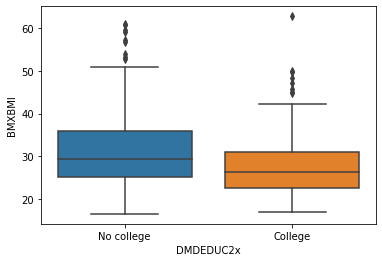

In [92]:
# Consider the variance of BMI within each of the subpopulations using graphical techniques
sns.boxplot(data=dx, x=dx["DMDEDUC2x"], y=dx["BMXBMI"])

In [93]:
# Calculate all the relevant values needed to compute the standard error
dx.groupby("DMDEDUC2x").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                 
                 mean       std   size
DMDEDUC2x                             
College     27.808187  7.358264  171.0
No college  31.257345  8.256083  354.0

In [94]:
# Consider the variance of BMI within each of the subpopulations through the estimated subpopulation variances
sem_college = 7.358 / np.sqrt(171)
sem_no_college = 8.256 / np.sqrt(354)
print(sem_college, sem_no_college)

0.5626803232731978 0.4388014492505771


In [102]:
# Calculate pooled and unpooled estimates of the standard error
# Test the null hypothesis that the two population means are equal, using each of the two different standard errors.
bmi_college = dx.loc[dx.DMDEDUC2x=="College", "BMXBMI"]
bmi_college = sm.stats.DescrStatsW(bmi_college)
bmi_no_college = dx.loc[dx.DMDEDUC2x=="No college", "BMXBMI"]
bmi_no_college = sm.stats.DescrStatsW(bmi_no_college)
print("pooled: ", sm.stats.CompareMeans(bmi_college, bmi_no_college).ztest_ind(usevar='pooled'))
print("unequal: ", sm.stats.CompareMeans(bmi_college, bmi_no_college).ztest_ind(usevar='unequal'))
print()

pooled:  (-4.643908450956429, 3.4187910067116e-06)
unequal:  (-4.833662355599106, 1.3404386169203498e-06)



__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

At a significance level of 0.05, there is sufficient evidence to reject the null hypothesis that the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40, are equal (p < 0.001). Hence, we conclude that there is a significant difference between the mean BMI of women between the ages of 30 and 40 who are college graduates and those who have not graduated from college. 

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The two populations have a relatively similar variance. When using unequal approach, the p-value is much smaller because the variance between the two populations are significantly different.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [108]:
dx = da[["BPXDI1", "BPXDI2"]].dropna()
db = dx.BPXDI1 - dx.BPXDI2
print(db.mean())
sm.stats.ztest(db)

0.3490407897187558


(4.140387087476751, 3.467202439743513e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

The first measurement of diastolic blood pressure is on average 0.35 mm/Hg greater than the second measurement. While this difference is not large, it is strongly statistically significant. That is, there is strong evidence that the mean values for the first and second diastolic blood pressure measurement differ.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [109]:
all_p = []
for n in 100, 200, 400, 800:
    pv = []
    for i in range(500):
        dz = dx.sample(n)
        db = dz.BPXDI1 - dz.BPXDI2
        _, p = sm.stats.ztest(db.values, value=0)
        pv.append(p)
    pv = np.asarray(pv)
    all_p.append(pv)
    print((pv <= 0.05).mean())

0.092
0.14
0.23
0.356


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.